# PROJECT 1
From the 'Project1.pdf' we have the following:

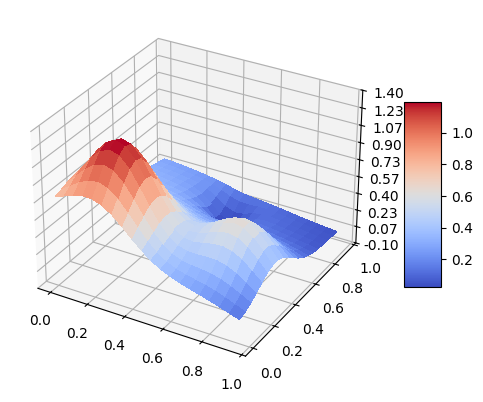

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Part a) : Ordinary Least Square (OLS) on the Franke function.

In [15]:
np.random.seed(0)

# Make data
# use FrankeFunction provided in the Project pdf and adapt to include noise
n = 100
x1 = np.linspace(0, 1, n)
x2 = np.linspace(0, 1, n)
x1m, x2m = np.meshgrid(x1,x2)
'''
FrankeFunction takes as input two coordinates x,y in [0,1].
'''
def FrankeFunction(x,y, noise=0):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + noise*np.random.normal(0, 1, (n,n))

y = FrankeFunction(x1m,x2m,1) # row ~ x2, column ~ x1
y.shape

(100, 100)

In [16]:
import scipy.special # for binomial coefficient
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

maxdegree = 5

degree = 1



#lastweek
degree = 2


''' WRONG

def data(degree, x1, x2, y):
    degreeplus1 = degree + 1
    
    n = x1.size 
    # 1. setting up design matrix
    # we work here with intercept column
    # the designmatrix s.t. we have the features 1, x1, x2, x1x2, x1^2, x2^2, ....
    # with max totaldegree 5
    # number of possible monoms up to degree 5 for 2 variables is 2+5 choose 5
    num_of_monoms = scipy.special.binom(7, 5)
    X = np.zeros((n, int(num_of_monoms)))
    
    c = 0
    for i in range(degreeplus1):
        for j in range(degreeplus1 - i):
            X[:,c] = x1**i * x2**j
            print('{} {}'.format(i,j))
            print(X[:,c])
            c += 1
            # MUSS MAN NICHT VLLT DAS SO MACHEN, DASS alli X1i und alle X2i kombis auftreten ?
            

    # split the data in test and training data
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # scaling of training data
    X_train_mean = np.mean(X_train, axis=0)
    X_train_scaled = X_train - X_train_mean
    y_train_mean = np.mean(y_train)
    y_train_scaled = y_train - y_train_mean
    
    #! in order to use beta for test → test has to be scaled by training means !!!
    X_test_scaled = X_test - X_train_mean
    y_test_scaled = y_test - y_train_mean

    return X, X_train, X_test, X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test

X, X_train, X_test,  X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test = data(degree,x1,x2,y)
'''

" WRONG\n\ndef data(degree, x1, x2, y):\n    degreeplus1 = degree + 1\n    \n    n = x1.size \n    # 1. setting up design matrix\n    # we work here with intercept column\n    # the designmatrix s.t. we have the features 1, x1, x2, x1x2, x1^2, x2^2, ....\n    # with max totaldegree 5\n    # number of possible monoms up to degree 5 for 2 variables is 2+5 choose 5\n    num_of_monoms = scipy.special.binom(7, 5)\n    X = np.zeros((n, int(num_of_monoms)))\n    \n    c = 0\n    for i in range(degreeplus1):\n        for j in range(degreeplus1 - i):\n            X[:,c] = x1**i * x2**j\n            print('{} {}'.format(i,j))\n            print(X[:,c])\n            c += 1\n            # MUSS MAN NICHT VLLT DAS SO MACHEN, DASS alli X1i und alle X2i kombis auftreten ?\n            \n\n    # split the data in test and training data\n    X_train, X_test, y_train, y_test = train_test_split(X, y)\n\n    # scaling of training data\n    X_train_mean = np.mean(X_train, axis=0)\n    X_train_scaled = X_tra

In [118]:
## nochmal anders.. weil ich denke dass X nicht n x ..., sondern n*n x ...
#lastweek
degree = 5



'''
generate data for meshgrid (x1m, x2m) and according y. degree is the maximum degree of the
polynomial represented by the designmatrix
'''
def data(degree, x1m, x2m, y):
    degreeplus1 = degree + 1
    
    n = x1m.size
    # 1. setting up design matrix
    # we work here with intercept column
    # the designmatrix s.t. we have the features 1, x1, x2, x1x2, x1^2, x2^2, ....
    # with max totaldegree 5
    # number of possible monoms up to degree 5 for 2 variables is 2+5 choose 5
    num_of_monoms = scipy.special.binom(degree + 2, degree)
    X = np.zeros((n, int(num_of_monoms)))

    x1m_flat = x1m.flatten()
    x2m_flat = x2m.flatten()
    
    c = 0
    for i in range(degreeplus1):
        for j in range(degreeplus1 - i):
            X[:,c] = x1m_flat**i * x2m_flat**j
            #print('{} {}'.format(i,j))
            #print(X[:,c])
            #print('x_1^{} * x_2^{}'.format(i,j)) 
            c += 1

    # 2. split the data in test and training data
    X_train, X_test, y_train, y_test = train_test_split(X, y.flatten())
 
    # 3. scaling of training data (by subtracting the mean value of each column)
    X_train_mean = np.mean(X_train, axis=0)
    X_train_scaled = X_train
    X_train_scaled[:,1:] = X_train_scaled[:,1:] - X_train_mean[1:]
    y_train_mean = np.mean(y_train)
    y_train_scaled = y_train - y_train_mean

    # in order to use beta for test → test has to be scaled by training means
    X_test_scaled = X_test
    X_test_scaled[:,1:] = X_test_scaled[:,1:] - X_train_mean[1:]
    #X_test_scaled = X_test - X_train_mean
    y_test_scaled = y_test - y_train_mean

    return X, X_train, X_test, X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test

X, X_train, X_test,  X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test = data(degree, x1m, x2m, y)

X shape: (10000, 21)


TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO !!!!!
You should
present a critical discussion of why and how you have scaled or not
scaled the data

In [119]:
x1m.flatten()

array([0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
       1.        ])

In [120]:
# following does not work bcs singularity: not
beta_lin = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled

ypredict_train_LR =  X_train_scaled @ beta_lin + y_train_mean
ypredict_test_LR = X_test_scaled @ beta_lin + y_train_mean
ypredict_all_LR = X @ beta_lin + y_train_mean
'''
def linear(X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean):

    linreg = LinearRegression(fit_intercept=False)
    linreg.fit(X_train_scaled,y_train_scaled)
    
    ypredict_train_LR = linreg.predict(X_train_scaled) + y_train_mean
    ypredict_test_LR = linreg.predict(X_test_scaled) + y_train_mean
    return ypredict_train_LR, ypredict_test_LR

#ypredict_train_LR, ypredict_test_LR = linear(X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean)
'''

'\ndef linear(X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean):\n\n    linreg = LinearRegression(fit_intercept=False)\n    linreg.fit(X_train_scaled,y_train_scaled)\n    \n    ypredict_train_LR = linreg.predict(X_train_scaled) + y_train_mean\n    ypredict_test_LR = linreg.predict(X_test_scaled) + y_train_mean\n    return ypredict_train_LR, ypredict_test_LR\n\n#ypredict_train_LR, ypredict_test_LR = linear(X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean)\n'

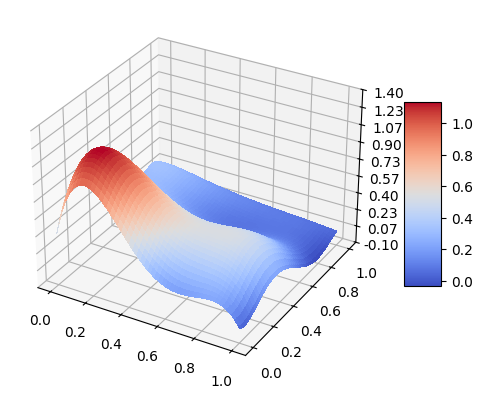

In [121]:
# plotting result
''' from Project1.pdf ''' # adapted

ypredict_all_LR_m = ypredict_all_LR.reshape(y.shape)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# Plot the surface.
surf = ax.plot_surface(x1m, x2m, ypredict_all_LR_m, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [122]:
from sklearn.metrics import mean_squared_error,  r2_score

print("Mean squared error for train: {}".format(mean_squared_error(y_train, ypredict_train_LR)))
print('R^2 score for train:          {}'.format(r2_score(y_train, ypredict_train_LR)))
print("Mean squared error for test:  {}".format(mean_squared_error(y_test, ypredict_test_LR)))
print('R^2 score for test:           {}'.format(r2_score(y_test, ypredict_test_LR)))

import pandas as pd

print('summary statistics for train prediction LR')
print(pd.DataFrame(ypredict_train_LR).describe())
print('summary statistics for test prediction LR')
print(pd.DataFrame(ypredict_test_LR).describe())

Mean squared error for train: 0.002091381037475199
R^2 score for train:          0.9748888930765982
Mean squared error for test:  0.002059145848850785
R^2 score for test:           0.9741150005848747
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.406510
std       0.284964
min      -0.036057
25%       0.177045
50%       0.331939
75%       0.547935
max       1.145946
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.402044
std       0.280488
min      -0.036330
25%       0.172692
50%       0.334289
75%       0.540994
max       1.146656


#### Consider the maximum degree 5:

In the case that we don't include any noise when generating the data the following can be observed.
Both for the test and the training data, the mean squared error is about 0.002 (and they differ by less than $3 \cdot 10^{-5}$), and thus, the MSE is very close to zero. This means that the model fits the data it was trained on very good and as it fits the test data as well, the model is not overfitting.
As also both $R^2$ values are about 0.975 (and differ by less than 0.0008), and thus, very close to one, the variation in the response variable is well explained by the model.

In the case that we add a noise with the standard normal distribution to the response data, the observations are different.
The MSE for both the training and test data is about 0.97 (with the MSE for the test data being larger by less than 0.0063). Since the predicted data is between -0.04 and 1.14, the squareroot of the MSE is again close to one, so there is a lot of large variation between the data and the prediction. 
As the $R^2$ score is about 0.0825 for the training and about 0.0682 for the test data, the score implies that the variation is not well described by the model.



#### Consider maximum degree < 5 (by the following code)

In case of no noise:
If we choose that the maximum degree is equal to one, we see that the MSE both for train and test is about 0.023 and the R^2 value is about 0.72. So the variation in the response variable is to a small extent described by the model, but not well. As the response values are approximately between 0 and 1, the MSE is not very low, but still good.
With rising degree, we can observe that the MSE values get lower and the the R^2 value gets larger, which means that the model explains the outcome better.

If noise is added, the following can be observed.
The MSE both for the test and training data is about 1 and and the R^2 value is about 0.05, if we consider the model of maximum degree one.
Therefore, the variation in the response is not described by the model and the MSE of 1 is very large, considering that our reponse values lie approximately between 0 and 1.
Up to maximum degree 5, a very small improvement can be observed in the MSE (it decreases) and the R^2 score (it increases), but it is not of great significance.

#### values of beta
Considering the maximum degree 1: beta takes the value -0.67313642 for $x_2$ and -0.49630101 for $x_1$ and otherwise zero.
Maximum degree = 2: beta takes -0.74843631 for $x_2$, -0.3590916 for $x_2^2$,  -1.03851498 for $x_1$,  0.87840069 for $x_1x_2$ and  0.09449293 for $x_1^2$.
Up to degree 5, where we have $$\beta=[  0. ,           3.76172863 , -8.77999575,  -7.50937771 , 28.31391323 ,  -16.00820602 ,  7.60734352 ,-14.56836927 , 19.96374956 -29.03415415,   16.35835394 ,-33.24193704 , 43.17632745 , -6.84963374  ,-5.48095372,   46.296272  , -51.98929167 , 10.13246828 ,-22.05552808  , 18.52085506,    1.03304723],$$ we can observe that the values for beta tend to get larger in their absolute value even in the positions where they correspond to $x_1$ and $x_2$.



 TODO CHANGE vllt N ?


In [123]:
0.0021049852262325836 - 0.00207510044393024
0.9752500308178186 - 0.9745251769060062
0.977703887691506 - 0.9714638450379705

a = np.array([1])

0.006240042653535505

### consider now different max degrees

DEGREE = 1
X shape: (10000, 3)
beta = [-7.34221711e-16 -6.64812876e-01 -5.00749844e-01]


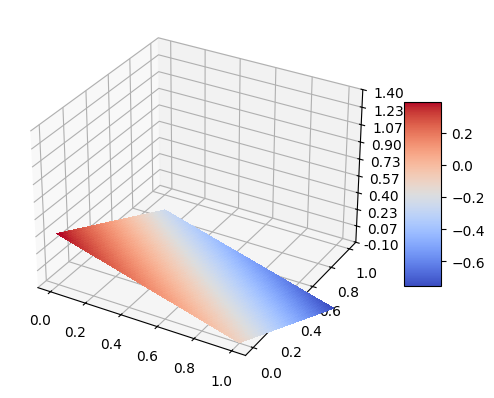

Mean squared error for train: 0.023030658024963232
R^2 score for train:          0.7196536770346444
Mean squared error for test:  0.02431909503944975
R^2 score for test:           0.7068850459241321
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.405113
std       0.243162
min      -0.170719
25%       0.226845
50%       0.405045
75%       0.582279
max       0.988129
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.406050
std       0.241322
min      -0.177434
25%       0.233560
50%       0.405873
75%       0.578857
max       0.983071
DEGREE = 2
X shape: (10000, 6)
beta = [-3.65939917e-15 -7.37786046e-01 -3.65421793e-01 -1.03717326e+00
  8.74920903e-01  9.68945324e-02]


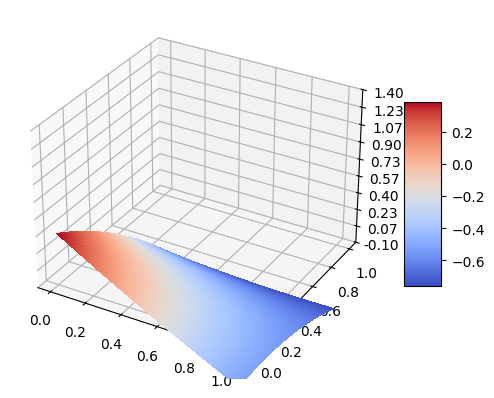

Mean squared error for train: 0.01731959496564905
R^2 score for train:          0.7901344537854473
Mean squared error for test:  0.016169268381034427
R^2 score for test:           0.8024162886250695
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.405975
std       0.255375
min      -0.006260
25%       0.213550
50%       0.360728
75%       0.577332
max       1.164864
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.406688
std       0.257958
min      -0.006268
25%       0.214906
50%       0.358209
75%       0.565803
max       1.157374
DEGREE = 3
X shape: (10000, 10)
beta = [ 1.63711275e-14  1.32309528e+00 -6.45229464e+00  4.52872166e+00
 -5.01024557e-01  1.90669257e+00 -1.41677927e+00 -1.53544872e+00
  3.89522925e-01  9.53152731e-01]


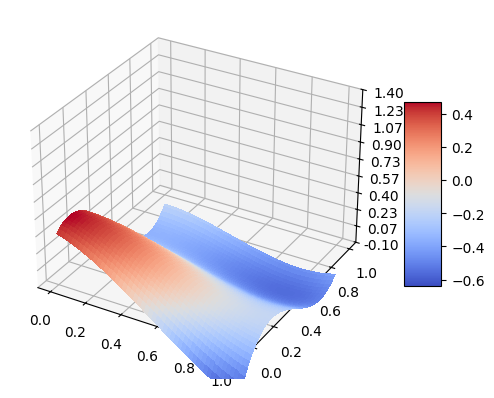

Mean squared error for train: 0.007797814820703665
R^2 score for train:          0.9046403136197751
Mean squared error for test:  0.007787570597245479
R^2 score for test:           0.9073802606404564
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.404022
std       0.272001
min      -0.102309
25%       0.185366
50%       0.354301
75%       0.590918
max       1.054652
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.407649
std       0.276257
min      -0.079530
25%       0.189961
50%       0.355220
75%       0.594553
max       1.051565
DEGREE = 4
X shape: (10000, 15)
beta = [ 1.44979243e-13  3.10613160e+00 -1.23396647e+01  1.24969354e+01
 -3.51989419e+00  3.99254761e+00 -2.15558124e+00  1.27437779e+00
 -1.84752373e+00 -1.84771020e+01  7.88404571e+00  5.91720193e-02
  2.40370353e+01 -5.02012775e+00 -1.02983526e+01]


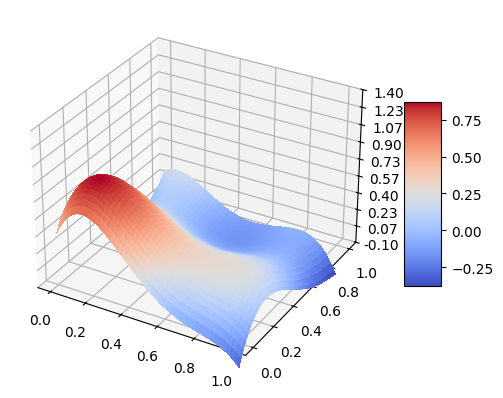

Mean squared error for train: 0.00404404857039316
R^2 score for train:          0.951155335125738
Mean squared error for test:  0.0041904894699276215
R^2 score for test:           0.9482547590215431
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.407516
std       0.280643
min      -0.182487
25%       0.178786
50%       0.348029
75%       0.560892
max       1.092236
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.399969
std       0.278542
min      -0.175883
25%       0.172807
50%       0.341965
75%       0.550567
max       1.092037
DEGREE = 5
X shape: (10000, 21)
beta = [ 1.73500103e-13  3.70462383e+00 -8.20962528e+00 -8.98577304e+00
  2.98647612e+01 -1.65837091e+01  7.88586686e+00 -1.51833113e+01
  2.04577188e+01 -2.91121452e+01  1.62308876e+01 -3.44903821e+01
  4.50192762e+01 -7.71783283e+00 -5.14101163e+00  4.84725167e+01
 -5.41345950e+01  1.03443651e+01 -2.36365052e+01  1.94699878e+01
  1.407897

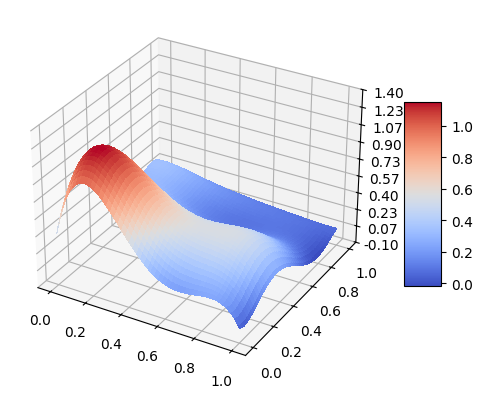

Mean squared error for train: 0.002099941335510738
R^2 score for train:          0.9742627829984424
Mean squared error for test:  0.002036652856954551
R^2 score for test:           0.975936482821102
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.406249
std       0.281961
min      -0.031808
25%       0.179640
50%       0.335838
75%       0.543469
max       1.151156
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.403232
std       0.289247
min      -0.029385
25%       0.168656
50%       0.321928
75%       0.542743
max       1.148946


In [131]:
y = FrankeFunction(x1m,x2m,0) # row ~ x2, column ~ x1

import scipy.special # for binomial coefficient
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  r2_score
import pandas as pd

maxdegree = 5
num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

betas = np.zeros((5, num_monoms)) # for maxdegree = 5: 7 choose 5 is the number of possible monoms up to degree 5 for 2 variables
MSE = np.zeros((5,2)) # 0.column for train, 1. for test
R2 = np.zeros((5,2))

degrees = np.arange(1,maxdegree + 1)
for degree in degrees:
    print('DEGREE = ' + str(degree))
    X, X_train, X_test,  X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test = data(degree, x1m, x2m, y)
    
    # following does not work bcs singularity: not
    beta_lin = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
    betas[degree-1] = np.hstack([ beta_lin, np.zeros(( num_monoms - beta_lin.size,))])

    print('beta = {}'.format(beta_lin))
    
    ypredict_train_LR =  X_train_scaled @ beta_lin + y_train_mean
    ypredict_test_LR = X_test_scaled @ beta_lin + y_train_mean
    ypredict_all_LR = X @ beta_lin + y_train_mean
    
    ''' from Project1.pdf ''' # adapted
    
    ypredict_all_LR_m = ypredict_all_LR.reshape(y.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    # Plot the surface.
    surf = ax.plot_surface(x1m, x2m, ypredict_all_LR_m, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    ''''''
    
    print("Mean squared error for train: {}".format(mean_squared_error(y_train, ypredict_train_LR)))
    print('R^2 score for train:          {}'.format(r2_score(y_train, ypredict_train_LR)))
    print("Mean squared error for test:  {}".format(mean_squared_error(y_test, ypredict_test_LR)))
    print('R^2 score for test:           {}'.format(r2_score(y_test, ypredict_test_LR)))

    MSE[degree-1, 0] = mean_squared_error(y_train, ypredict_train_LR)
    MSE[degree-1, 1] = mean_squared_error(y_test, ypredict_test_LR)
    R2[degree-1, 0] = r2_score(y_train, ypredict_train_LR)
    R2[degree-1, 1] = r2_score(y_test, ypredict_test_LR)
        
    print('summary statistics for train prediction LR')
    print(pd.DataFrame(ypredict_train_LR).describe())
    print('summary statistics for test prediction LR')
    print(pd.DataFrame(ypredict_test_LR).describe())

<function matplotlib.pyplot.show(close=None, block=None)>

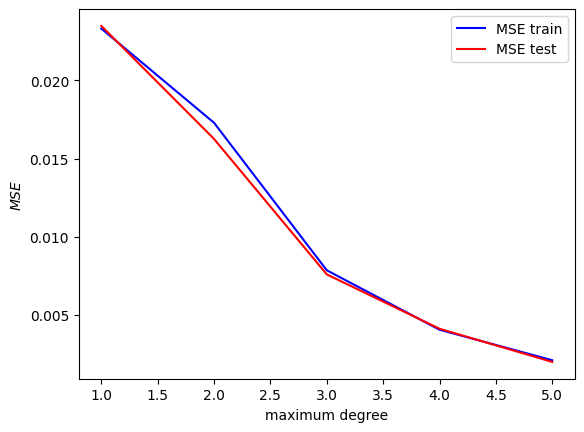

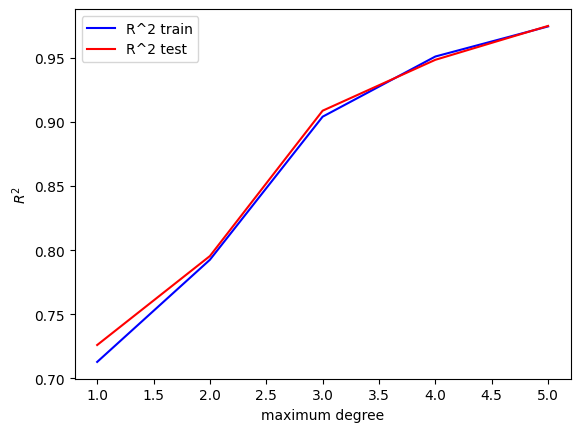

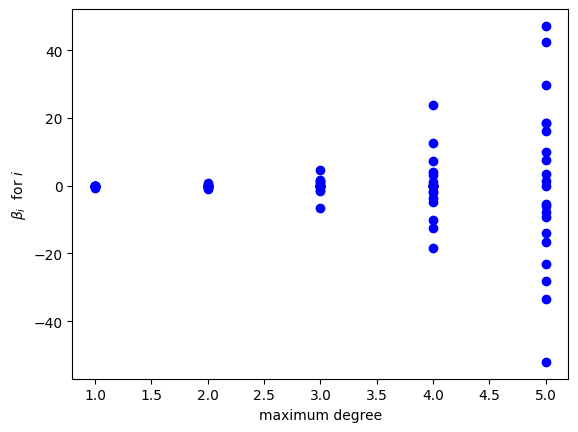

In [130]:
fig = plt.figure()
plt.plot(degrees,MSE[:,0], 'b', label='MSE train')
plt.plot(degrees,MSE[:,1], 'r', label='MSE test')
ax = plt.gca()
ax.legend()
plt.xlabel(r'maximum degree')
plt.ylabel(r'$MSE$')
plt.show

fig = plt.figure()
plt.plot(degrees,R2[:,0], 'b', label='R^2 train')
plt.plot(degrees,R2[:,1], 'r', label='R^2 test')
ax = plt.gca()
ax.legend()
plt.xlabel(r'maximum degree')
plt.ylabel(r'$R^2$')
plt.show

fig = plt.figure()
for i in range(X.shape[1]):
    plt.plot(degrees,betas[:,i], 'bo')
plt.xlabel(r'maximum degree')
plt.ylabel(r'$\beta_i$  for $i$')
plt.show

### TODO:
- You should present a critical discussion of why and how you have scaled or not scaled the data
- still use np.linalg.pinv → why does inv not work ??

## Part b) : Adding Ridge regression for the Franke function.

In [54]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [133]:
import scipy.special # for binomial coefficient
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  r2_score
import pandas as pd

y = FrankeFunction(x1m,x2m,0) # row ~ x2, column ~ x1
maxdegree = 5

def Ridge_analysis(lambd):

    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))
    betas = np.zeros((5, num_monoms)) # for maxdegree = 5: 7 choose 5 is the number of possible monoms up to degree 5 for 2 variables
    MSE = np.zeros((5,2)) # 0.column for train, 1. for test
    R2 = np.zeros((5,2))
    
    degrees = np.arange(1,maxdegree + 1)
    for degree in degrees:
        #print('DEGREE = ' + str(degree))
        X, X_train, X_test,  X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test = data(degree, x1m, x2m, y)
        
        # RIDGE REGRESSION:
        beta_rr = np.linalg.inv(X_train_scaled.T @ X_train_scaled + lambd*np.identity(X_train_scaled.shape[1])) @ X_train_scaled.T @ y_train_scaled
        betas[degree-1] = np.hstack([ beta_rr, np.zeros(( num_monoms - beta_rr.size,))])
        
        #print('beta = {}'.format(beta_rr))
        
        ypredict_train_RR =  X_train_scaled @ beta_rr + y_train_mean
        ypredict_test_RR = X_test_scaled @ beta_rr + y_train_mean
        ypredict_all_RR = X @ beta_rr + y_train_mean

        
        ''' from Project1.pdf ''' # adapted

        '''
        ypredict_all_RR_m = ypredict_all_RR.reshape(y.shape)
        
        fig = plt.figure()
        ax = fig.add_subplot(projection = '3d')
        # Plot the surface.
        surf = ax.plot_surface(x1m, x2m, ypredict_all_RR_m, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        # Customize the z axis.
        ax.set_zlim(-0.10, 1.40)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)
        plt.show()
        '''
        
        ''''''
    
        '''
        print("Mean squared error for train: {}".format(mean_squared_error(y_train, ypredict_train_RR)))
        print('R^2 score for train:          {}'.format(r2_score(y_train, ypredict_train_RR)))
        print("Mean squared error for test:  {}".format(mean_squared_error(y_test, ypredict_test_RR)))
        print('R^2 score for test:           {}'.format(r2_score(y_test, ypredict_test_RR)))
        '''
        
        MSE[degree-1, 0] = mean_squared_error(y_train, ypredict_train_RR)
        MSE[degree-1, 1] = mean_squared_error(y_test, ypredict_test_RR)
        R2[degree-1, 0] = r2_score(y_train, ypredict_train_RR)
        R2[degree-1, 1] = r2_score(y_test, ypredict_test_RR)


    return betas, MSE, R2


lambdas = [0.0001, 0.001, 0.01, 0.1,1,10]
num_lambdas = len(lambdas)
betas_lam = np.zeros((5, int(scipy.special.binom(maxdegree + 2, maxdegree)), num_lambdas))
MSE_lam = np.zeros((5,2, num_lambdas))
R2_lam = np.zeros((5,2, num_lambdas))

it = 0
for lambd in lambdas:
    betas_lam[:,:,it], MSE_lam[:,:,it], R2_lam[:,:,it] = Ridge_analysis(lambd)
    it += 1


X shape: (10000, 3)
X shape: (10000, 6)
X shape: (10000, 10)
X shape: (10000, 15)
X shape: (10000, 21)
X shape: (10000, 3)
X shape: (10000, 6)
X shape: (10000, 10)
X shape: (10000, 15)
X shape: (10000, 21)
X shape: (10000, 3)
X shape: (10000, 6)
X shape: (10000, 10)
X shape: (10000, 15)
X shape: (10000, 21)
X shape: (10000, 3)
X shape: (10000, 6)
X shape: (10000, 10)
X shape: (10000, 15)
X shape: (10000, 21)
X shape: (10000, 3)
X shape: (10000, 6)
X shape: (10000, 10)
X shape: (10000, 15)
X shape: (10000, 21)
X shape: (10000, 3)
X shape: (10000, 6)
X shape: (10000, 10)
X shape: (10000, 15)
X shape: (10000, 21)


[Text(0.5, 0, 'maximum degree'), Text(0, 0.5, '$\\beta_i$ for $i$')]

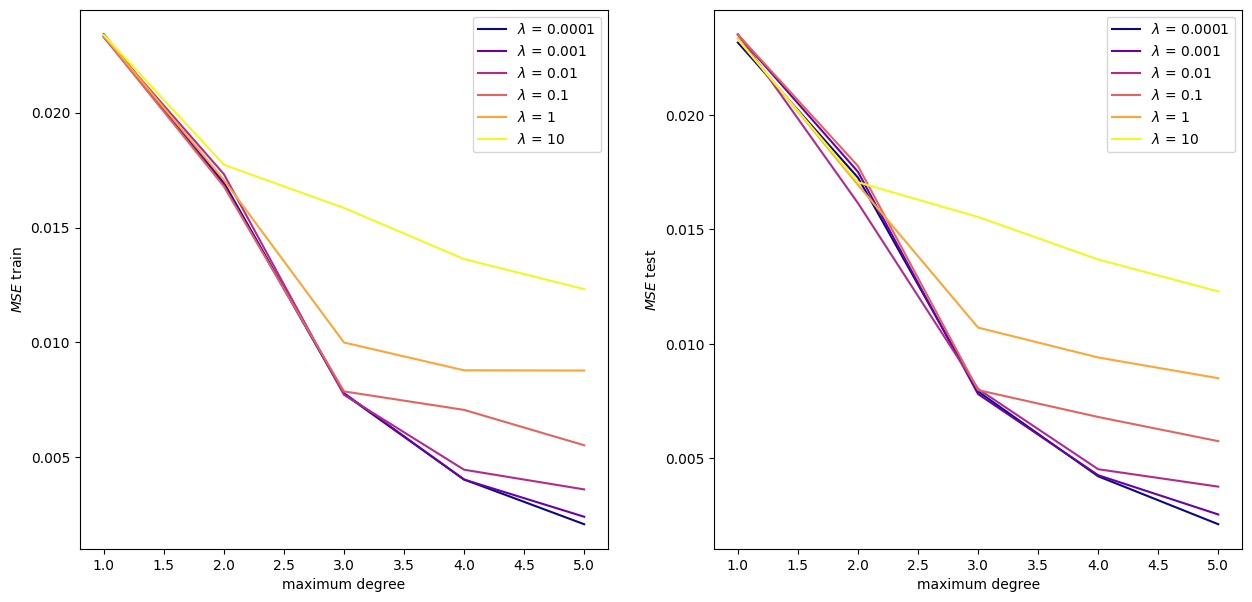

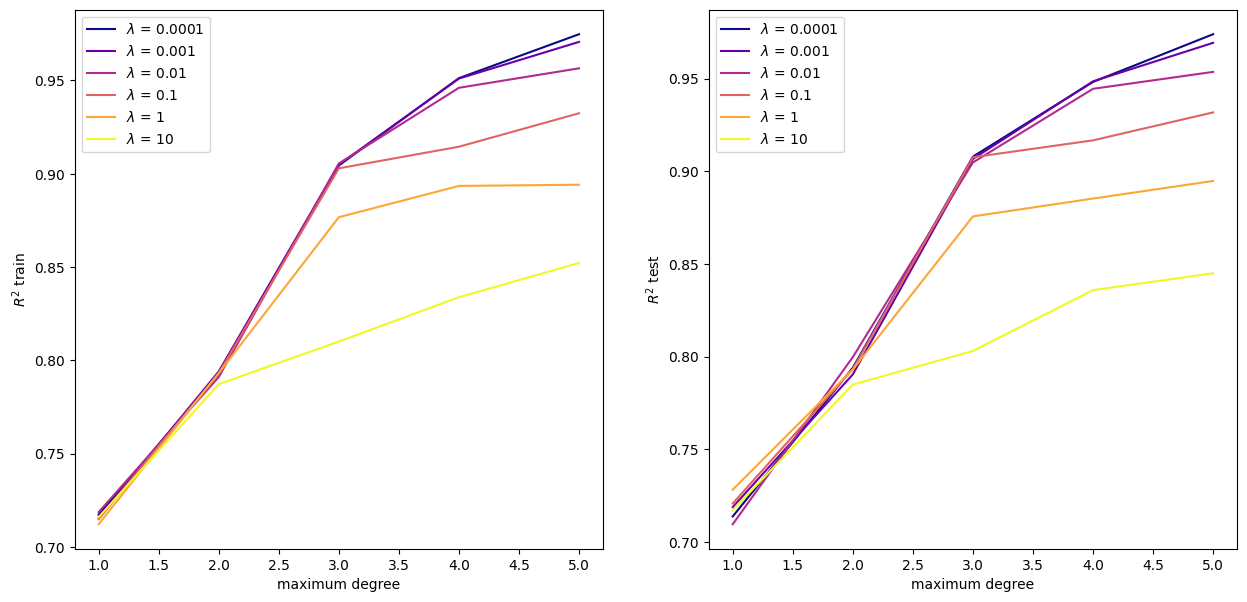

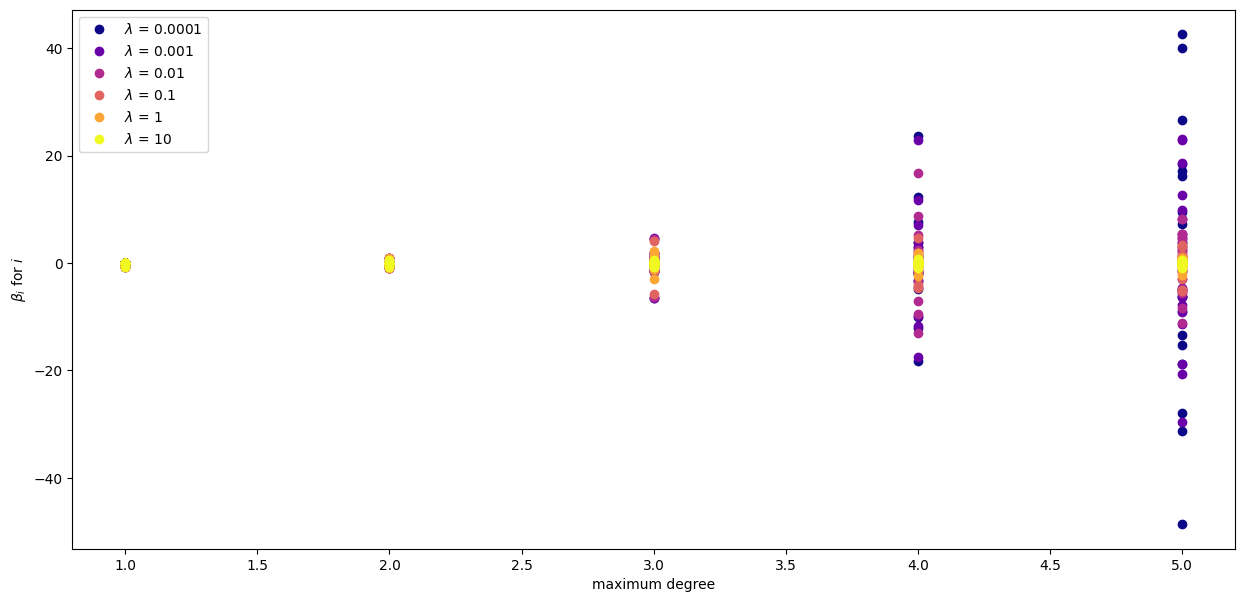

In [134]:
import matplotlib as mpl

# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

# plot MSE for train, test and lambda values
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
it = 0
for lambd in lambdas:
    axs[0].plot(degrees,MSE_lam[:,0, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs[1].plot(degrees,MSE_lam[:,1, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs[0].legend()
axs[1].legend()
axs[0].set(xlabel =r'maximum degree', ylabel= r'$MSE$ train')
axs[1].set(xlabel =r'maximum degree', ylabel= r'$MSE$ test')


# plot R^2 for train and test  and lambda values
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
it = 0
for lambd in lambdas:
    axs[0].plot(degrees,R2_lam[:,0, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs[1].plot(degrees,R2_lam[:,1, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs[0].legend()
axs[1].legend()
axs[0].set(xlabel =r'maximum degree', ylabel= r'$R^2$ train')
axs[1].set(xlabel =r'maximum degree', ylabel= r'$R^2$ test')


# TODO THIS IS STILL SHIIIT → MAKE SUBPLOTS FOR EVER LAMBDA !!!!
# plot beta for lambda values
fig = plt.figure(figsize=(15, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees,betas_lam[:,0, it], marker='o', linestyle='', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    for i in range(1,X.shape[1]):
        axs.plot(degrees,betas_lam[:,i, it], marker='o', linestyle='', c = colors[it])
    it += 1

axs.legend()

axs.set(xlabel =r'maximum degree', ylabel= r'$\beta_i$ for $i$')

**TODO**:
- [x]  don't take mean of first column !!! coorect !!
- analysis !!!


## Part c): Adding Lasso for the Franke function.

**TODO**:
- everything

## Part d): Paper and pencil part.

The assumption for linear regression is that there is a continuous function $f$ that and a normal distributed error $\varepsilon \sim \mathcal N(0,\sigma^2)$ so that the data is described by $$y = f(x) + \varepsilon.$$
The continuous part is approximated by $\tilde y$ as $X\beta$ so that $\beta$ minimizes the squared loss.

We show that the expected value of the elements $y_i$ of $y$ is $X_{i,*} \beta$ for $i$ in the range $1, \dots, N$.

Proof:
We have the linear model $y= X\beta + \vec \varepsilon$ for the designmatrix $X$, the parameters $\beta$ and $\varepsilon \sim \mathcal N(0, \sigma^2)$.
So we have $\mathbb E[y_i] = \mathbb E[X_{i,*}\beta + \varepsilon]$ for  $i = 0, \dots, n-1$. Let $p$ denote the number of parameters, then we have 
$$\mathbb E[X_{i,*}\beta + \varepsilon] = \mathbb E[X_{i,*}\beta] +  \mathbb E[\varepsilon] = X_{i,*} \beta + \mathbb E[\varepsilon]$$
because $X_{i,*} \beta$ is non-stochastic.
Then we can use the expeted value of $\varepsilon$, since we know its distribution $$ = X_{i,*} \beta + 0.$$ $\square$



**TODO** :
- copy the rest also over here.

The aim of this report is to find the best fit of the topological data corresponding to 

First, the model is developed and analysed for the Franke function, which is often used to 

by section 1.2.0. of ... know that franke funktion standard test problem for fitting functions ! https://core.ac.uk/outputs/36727660/ 

First, the Analysis and model is developed for the Franke function, as this is 